In [1]:
# Experimentation with networks

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np

input1 = Input(shape=(336,))
input2 = Input(shape=(336,))
input = Concatenate()([input1, input2])
x = Dense(2)(input)
x = Dense(1)(x)
model = Model(inputs=[input1, input2], outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 336)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 336)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 672)          0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 2)            1346        ['concatenate[0][0]']        

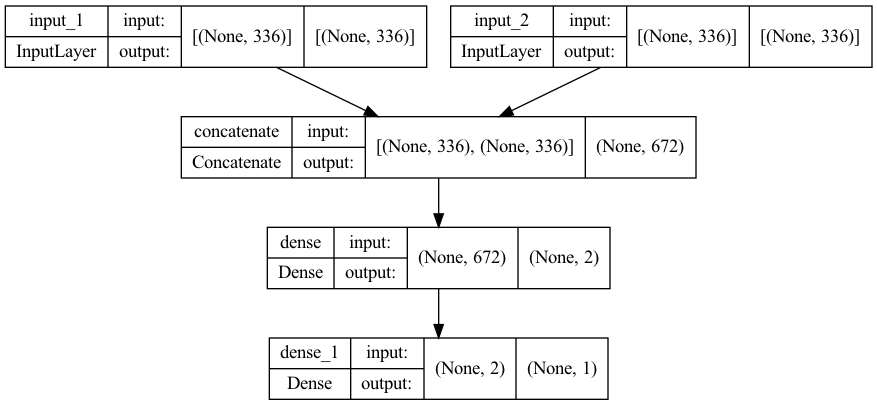

In [2]:
tf.keras.utils.plot_model(model, to_file="Paris_baby_model.png", show_shapes=True)

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf

input_tile = Input(shape=(224, 224, 3))
base_model_tile = VGG19(weights="imagenet", include_top=False, input_tensor=input_tile)
model_tile = Model(inputs=base_model_tile.input, outputs=base_model_tile.get_layer('block4_pool').output)
model_tile.output_shape


(None, 14, 14, 512)

In [21]:
# Input picture and extract features.
input_tile = Input(shape=(224, 224, 3))
base_model_tile = VGG19(weights="imagenet", include_top=False, input_tensor=input_tile)
model_tile = Model(inputs=base_model_tile.input, outputs=base_model_tile.get_layer('block4_pool').output)
model_base = Sequential()
model_base.add(model_tile)
model_base.add(Dense(256, activation='relu'))
model_base.add(Dropout(0.3))
model_base.add(Flatten())
model_base.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_31 (Functional)       (None, 14, 14, 512)       10585152  
                                                                 
 dense_50 (Dense)            (None, 14, 14, 256)       131328    
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
Total params: 10,716,480
Trainable params: 10,716,480
Non-trainable params: 0
_________________________________________________________________


In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf

# Input picture and extract features.
input_tile = Input(shape=(224, 224, 3))
base_model_tile = VGG19(weights="imagenet", include_top=False, input_tensor=input_tile)

model_tile = Model(inputs=base_model_tile.input, outputs=base_model_tile.get_layer('block4_pool').output)
model_base = Sequential()
model_base.add(model_tile)
model_base.add(Dense(256, activation='relu'))
model_base.add(Dropout(0.3))
model_base.add(Flatten())

# define two more sets of inputs.
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# the second branch operates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = concatenate([model_base.output, x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(512, activation="relu")(combined)
z = Dense(256, activation="relu")(z)
z = Dense(2, activation="relu")(z)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the three branches and
# then output a single value
model = Model(inputs=[model_base.input,x.input, y.input], outputs=z)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_1_input (InputLayer)     [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 14, 14, 512)  10585152    ['model_1_input[0][0]']          
                                                                                                  
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 14, 14, 256)  131328      ['model_1[0][0]']          

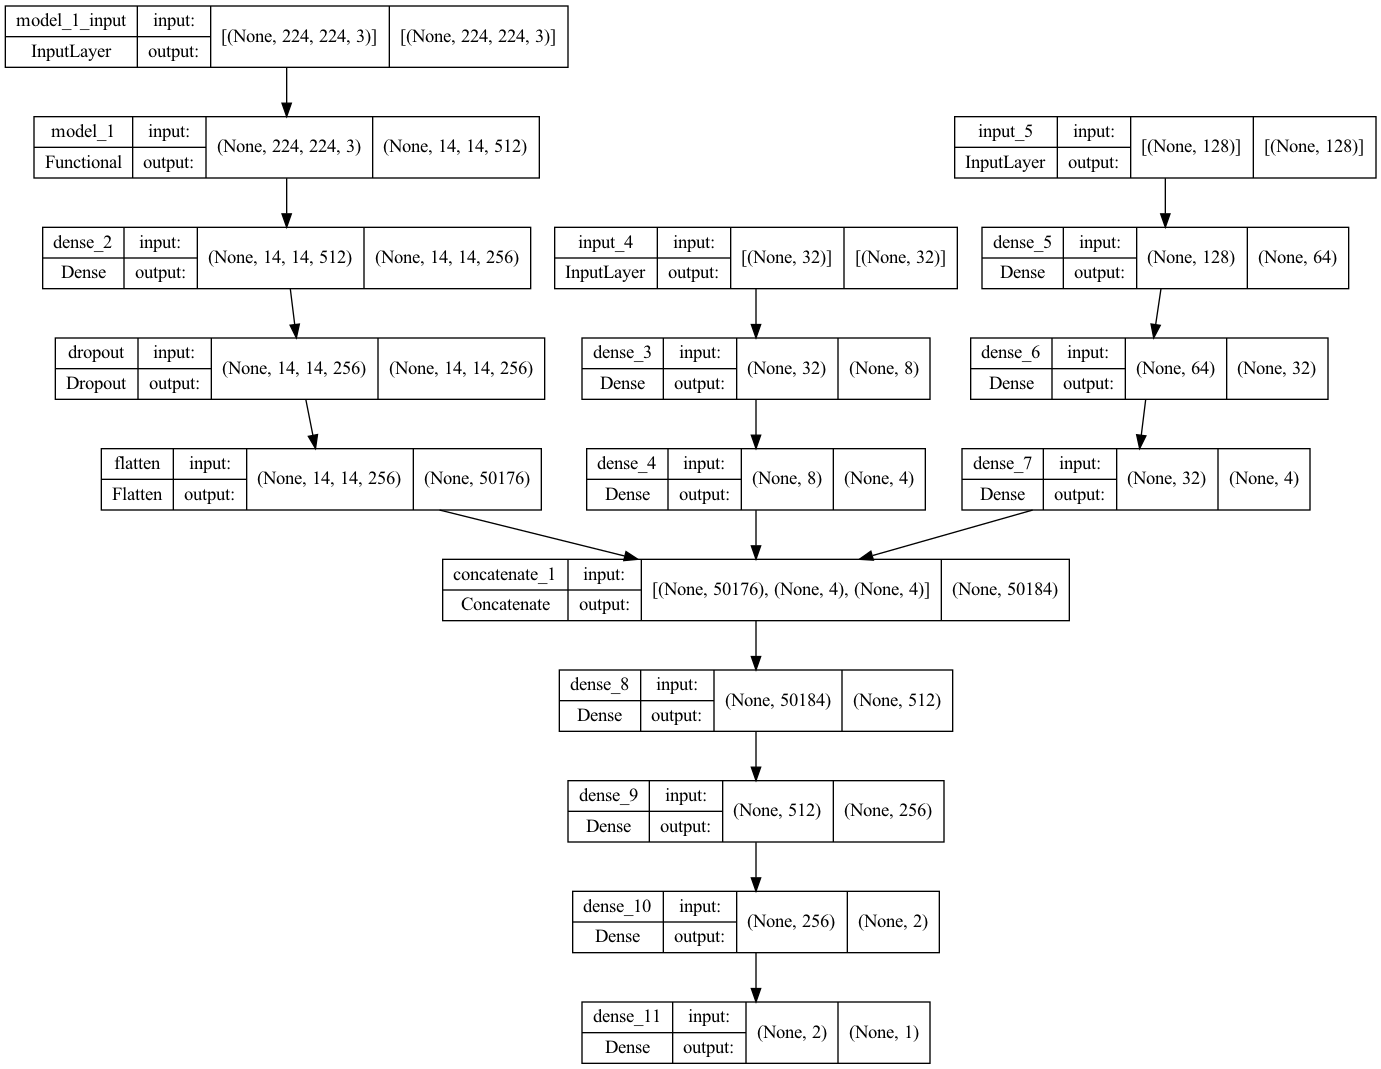

In [4]:
tf.keras.utils.plot_model(model, to_file="Paris_model.png", show_shapes=True)

In [9]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf

 
# The dimensions of our input image
img_width = 180
img_height = 180
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv3_block4_out"

# Input picture and extract features.
input_tile = Input(shape=(224, 224, 3))
base_model_tile = ResNet50V2(weights="imagenet", include_top=False, input_tensor=input_tile)

model_tile = Model(inputs=base_model_tile.input, outputs=base_model_tile.get_layer('conv3_block4_out').output)
model_base = Sequential()
model_base.add(model_tile)
model_base.add(Dense(256, activation='relu'))
model_base.add(Dropout(0.3))
model_base.add(Flatten())

# define two more sets of inputs.
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x = Dense(4, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# the second branch operates on the second input
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(4, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = concatenate([model_base.output, x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(512, activation="relu")(combined)
z = Dense(256, activation="relu")(z)
z = Dense(2, activation="relu")(z)
z = Dense(1, activation="linear")(z)
# our model will accept the inputs of the three branches and
# then output a single value
model = Model(inputs=[model_base.input,x.input, y.input], outputs=z)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_5_input (InputLayer)     [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_5 (Functional)           (None, 14, 14, 512)  1453568     ['model_5_input[0][0]']          
                                                                                                  
 input_9 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 14, 14, 256)  131328      ['model_5[0][0]']          

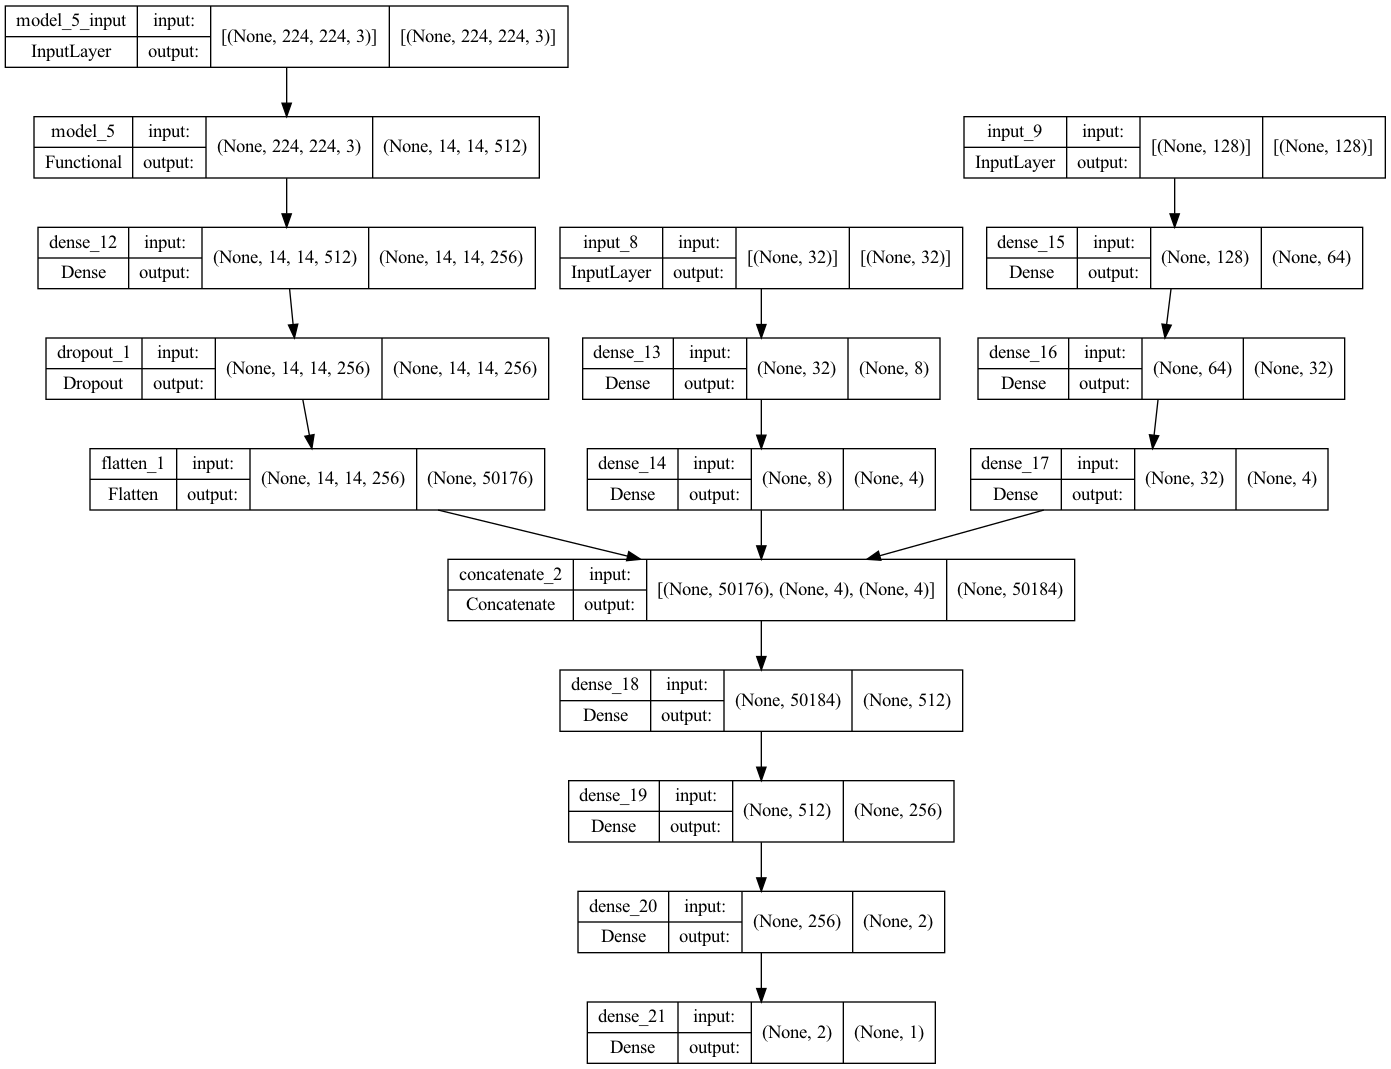

In [10]:
tf.keras.utils.plot_model(model, to_file="Paris_model_resnet.png", show_shapes=True)